In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('framingham_3000.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3000 non-null   int64  
 1   age              3000 non-null   int64  
 2   education        2925 non-null   float64
 3   currentSmoker    3000 non-null   int64  
 4   cigsPerDay       2985 non-null   float64
 5   BPMeds           2960 non-null   float64
 6   prevalentStroke  3000 non-null   int64  
 7   prevalentHyp     3000 non-null   int64  
 8   diabetes         3000 non-null   int64  
 9   totChol          2962 non-null   float64
 10  sysBP            3000 non-null   float64
 11  diaBP            3000 non-null   float64
 12  BMI              2983 non-null   float64
 13  heartRate        2999 non-null   float64
 14  glucose          2718 non-null   float64
 15  TenYearCHD       3000 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 375.1 KB


In [4]:
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

In [5]:
df.isnull().sum()

male                 0
age                  0
education           75
currentSmoker        0
cigsPerDay          15
BPMeds              40
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 17
heartRate            1
glucose            282
TenYearCHD           0
dtype: int64

In [6]:
df.fillna(df.median(), inplace=True)

In [7]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
df.shape

(3000, 16)

In [9]:
# Feature selection
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

selector = SelectKBest(score_func=f_classif, k='all')  # you can set k=best number
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
X = pd.DataFrame(X_new, columns=selected_features)

In [10]:
selected_features

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')


After SMOTE:
TenYearCHD
0    2541
1    2541
Name: count, dtype: int64


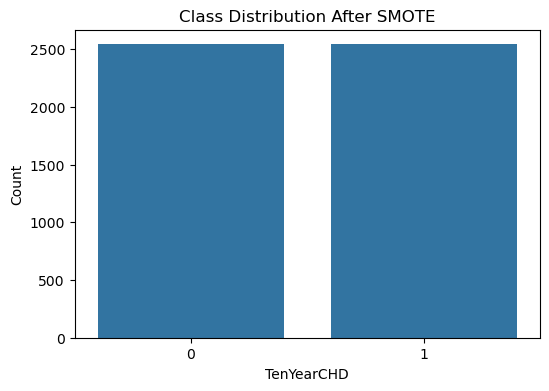

In [11]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# After balancing: show class distribution
print("\nAfter SMOTE:")
print(pd.Series(y_balanced).value_counts())

# Optional: Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_balanced)
plt.title("Class Distribution After SMOTE")
plt.xlabel("TenYearCHD")
plt.ylabel("Count")
plt.show()

In [12]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_scaled.shape

(3000, 15)

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train Random Forest model
model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [16]:
# Evaluation
y_pred = model.predict(X_test)

print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       492
           1       0.50      0.02      0.04       108

    accuracy                           0.82       600
   macro avg       0.66      0.51      0.47       600
weighted avg       0.76      0.82      0.75       600


🧮 Confusion Matrix:
[[490   2]
 [106   2]]


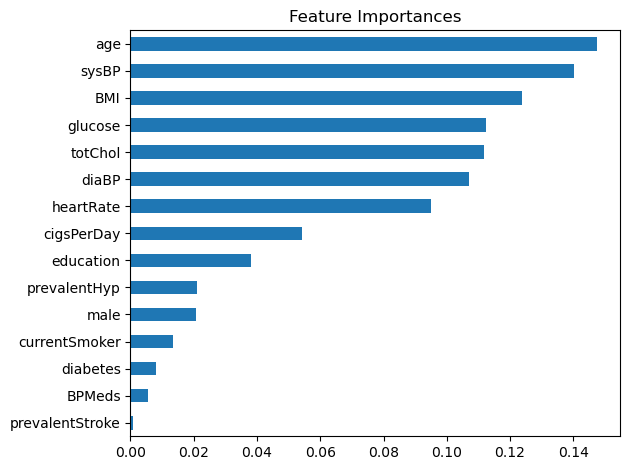

In [17]:
# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=selected_features)
feature_importances.sort_values().plot(kind='barh', title='Feature Importances')
plt.tight_layout()
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict on both train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Probabilities for ROC AUC
y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

# --- Training Metrics ---
print("\n📊 Training Metrics:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1 Score:", f1_score(y_train, y_train_pred))
print("ROC-AUC:", roc_auc_score(y_train, y_train_prob))

# --- Testing Metrics ---
print("\n📊 Testing Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_test_prob))



📊 Training Metrics:
Accuracy: 0.9995833333333334
Precision: 1.0
Recall: 0.9971509971509972
F1 Score: 0.9985734664764622
ROC-AUC: 1.0

📊 Testing Metrics:
Accuracy: 0.82
Precision: 0.5
Recall: 0.018518518518518517
F1 Score: 0.03571428571428571
ROC-AUC: 0.6785136254140318


In [19]:
import pickle

# Save all components in a dictionary
pipeline = {
    'model': model,
    'scaler': scaler,
    'selected_features': selected_features.tolist()
}

# Save to single pickle file
with open('framingham_inference_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print("✅ Inference pipeline saved as 'framingham_inference_pipeline.pkl'")


✅ Inference pipeline saved as 'framingham_inference_pipeline.pkl'


📊 Drift Detection Report:

🔹 Feature: male
   KS Statistic: 0.0000
   P-value      : 1.0000
   ✅ No significant drift detected


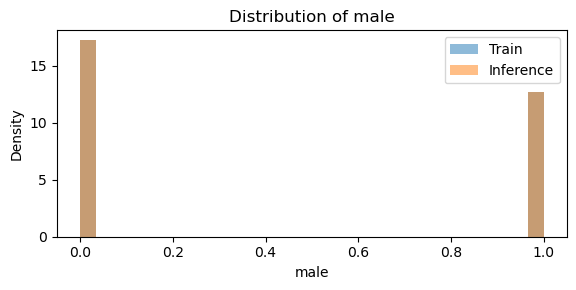

🔹 Feature: age
   KS Statistic: 0.0000
   P-value      : 1.0000
   ✅ No significant drift detected


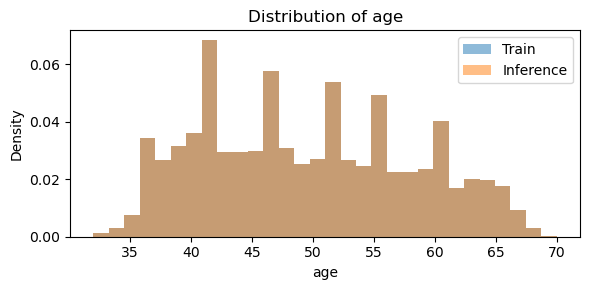

🔹 Feature: education
   KS Statistic: 0.0104
   P-value      : 0.9965
   ✅ No significant drift detected


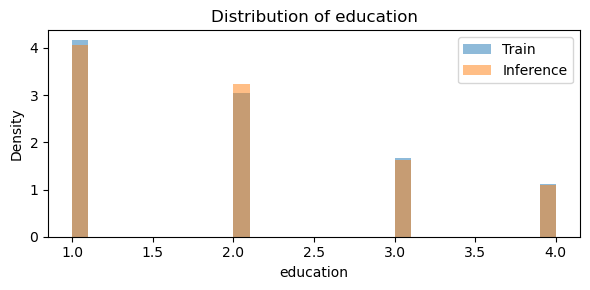

🔹 Feature: currentSmoker
   KS Statistic: 0.0000
   P-value      : 1.0000
   ✅ No significant drift detected


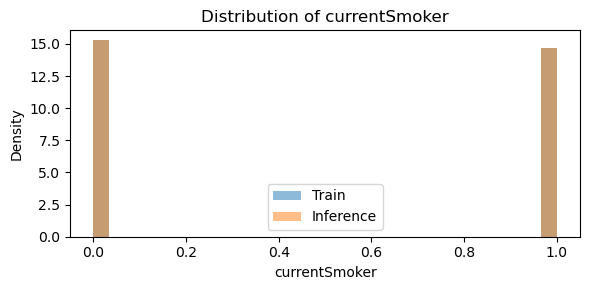

🔹 Feature: cigsPerDay
   KS Statistic: 0.0024
   P-value      : 1.0000
   ✅ No significant drift detected


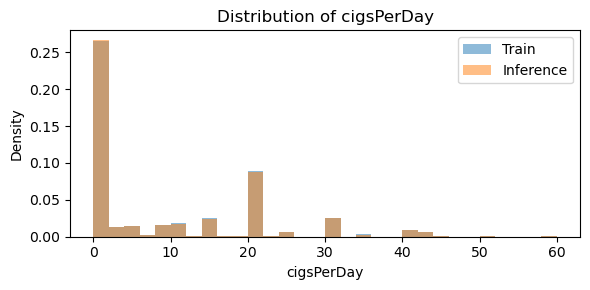

🔹 Feature: BPMeds
   KS Statistic: 0.0004
   P-value      : 1.0000
   ✅ No significant drift detected


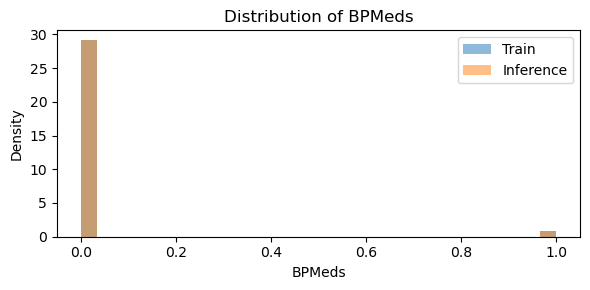

🔹 Feature: prevalentStroke
   KS Statistic: 0.0000
   P-value      : 1.0000
   ✅ No significant drift detected


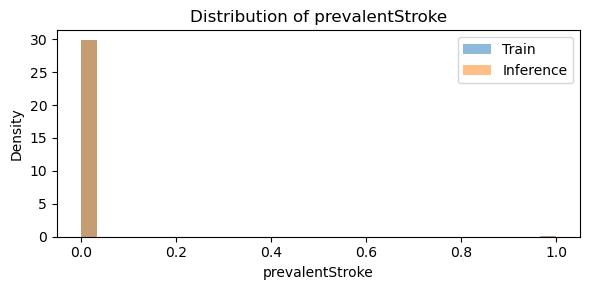

🔹 Feature: prevalentHyp
   KS Statistic: 0.0000
   P-value      : 1.0000
   ✅ No significant drift detected


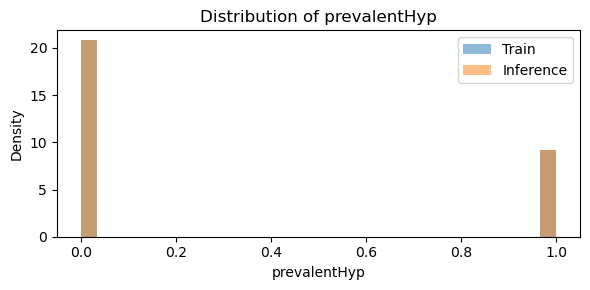

🔹 Feature: diabetes
   KS Statistic: 0.0000
   P-value      : 1.0000
   ✅ No significant drift detected


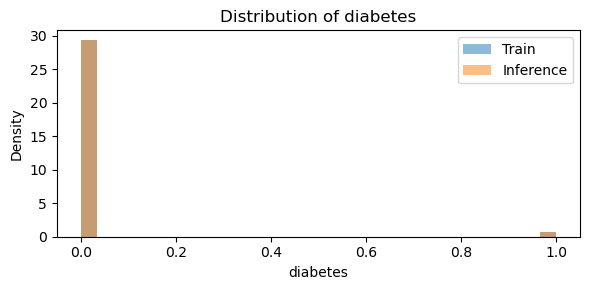

🔹 Feature: totChol
   KS Statistic: 0.0063
   P-value      : 1.0000
   ✅ No significant drift detected


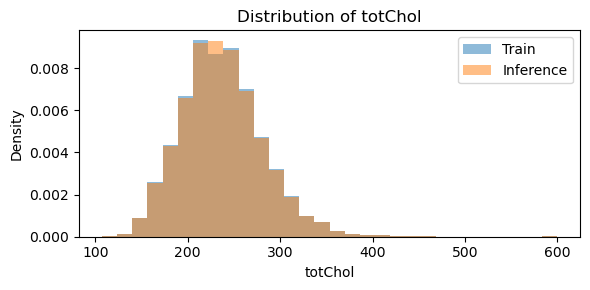

🔹 Feature: sysBP
   KS Statistic: 0.0000
   P-value      : 1.0000
   ✅ No significant drift detected


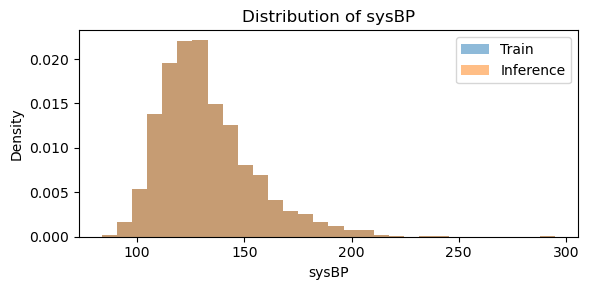

🔹 Feature: diaBP
   KS Statistic: 0.0000
   P-value      : 1.0000
   ✅ No significant drift detected


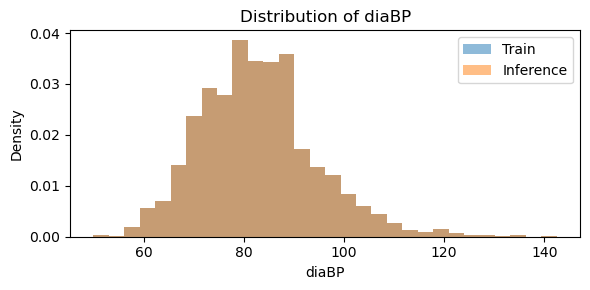

🔹 Feature: BMI
   KS Statistic: 0.0028
   P-value      : 1.0000
   ✅ No significant drift detected


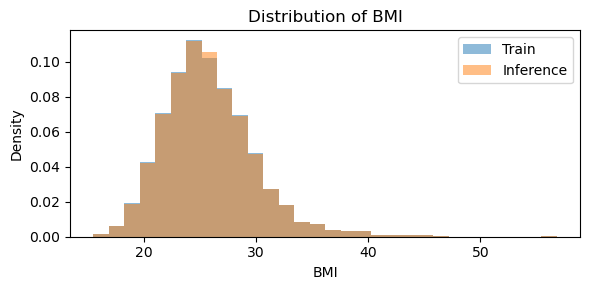

🔹 Feature: heartRate
   KS Statistic: 0.0002
   P-value      : 1.0000
   ✅ No significant drift detected


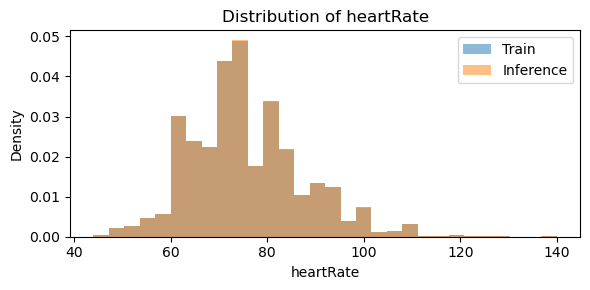

🔹 Feature: glucose
   KS Statistic: 0.0452
   P-value      : 0.0056
   ⚠️ Drift detected (distributions differ significantly)


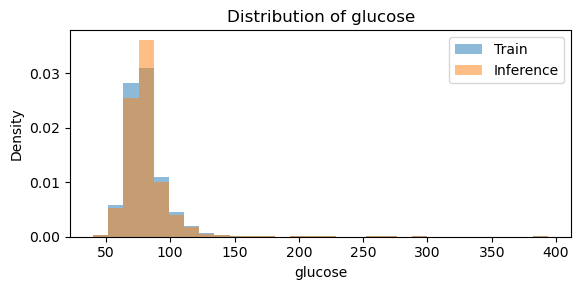

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Load datasets
train_df = pd.read_csv('framingham_3000.csv')
inference_df = pd.read_csv('framingham_3000_notarget.csv')

# Drop target column from training data
if 'TenYearCHD' in train_df.columns:
    train_df = train_df.drop(columns=['TenYearCHD'])

# Get common columns
common_cols = train_df.columns.intersection(inference_df.columns)

print("📊 Drift Detection Report:\n")

for col in common_cols:
    train_col = train_df[col].dropna()
    inf_col = inference_df[col].dropna()

    # KS test
    ks_stat, p_value = ks_2samp(train_col, inf_col)

    print(f"🔹 Feature: {col}")
    print(f"   KS Statistic: {ks_stat:.4f}")
    print(f"   P-value      : {p_value:.4f}")

    # Interpret result
    if p_value < 0.05:
        print("   ⚠️ Drift detected (distributions differ significantly)")
    else:
        print("   ✅ No significant drift detected")
    
    # Plot distributions
    plt.figure(figsize=(6, 3))
    plt.hist(train_col, bins=30, alpha=0.5, label='Train', density=True)
    plt.hist(inf_col, bins=30, alpha=0.5, label='Inference', density=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()


📊 Drift Detection Report:

🔹 Feature: male
   KS Statistic: 0.0168
   P-value      : 0.9612
   ✅ No significant drift detected


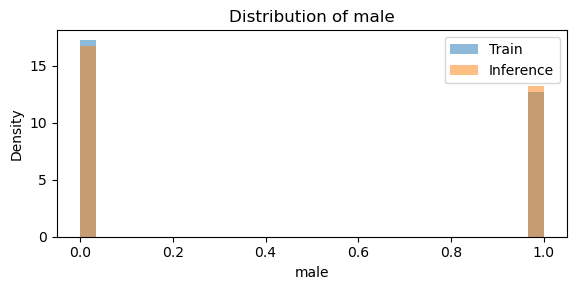

🔹 Feature: age
   KS Statistic: 0.0151
   P-value      : 0.9857
   ✅ No significant drift detected


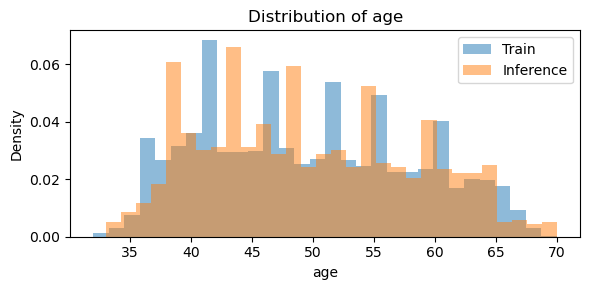

🔹 Feature: education
   KS Statistic: 0.0116
   P-value      : 0.9997
   ✅ No significant drift detected


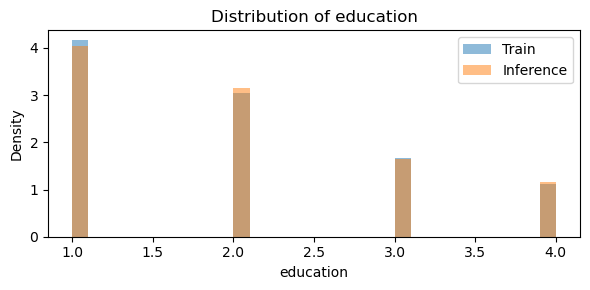

🔹 Feature: currentSmoker
   KS Statistic: 0.0129
   P-value      : 0.9982
   ✅ No significant drift detected


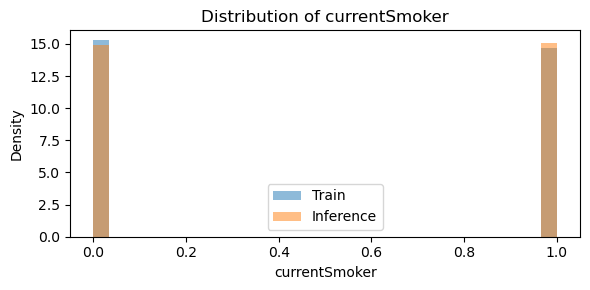

🔹 Feature: cigsPerDay
   KS Statistic: 0.0118
   P-value      : 0.9996
   ✅ No significant drift detected


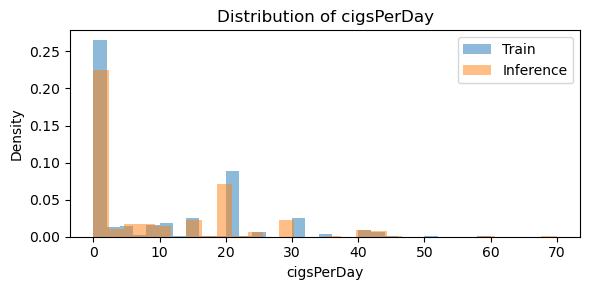

🔹 Feature: BPMeds
   KS Statistic: 0.0004
   P-value      : 1.0000
   ✅ No significant drift detected


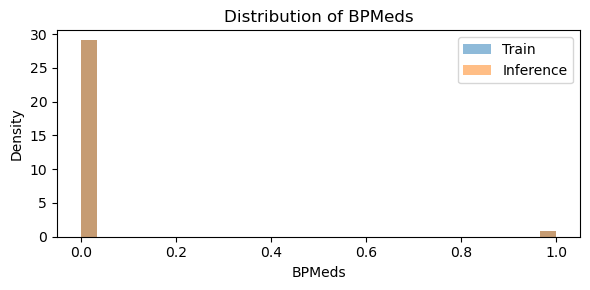

🔹 Feature: prevalentStroke
   KS Statistic: 0.0042
   P-value      : 1.0000
   ✅ No significant drift detected


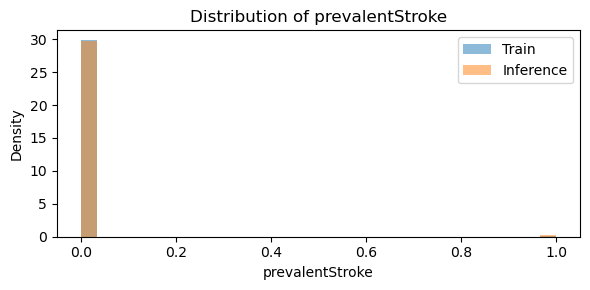

🔹 Feature: prevalentHyp
   KS Statistic: 0.0158
   P-value      : 0.9782
   ✅ No significant drift detected


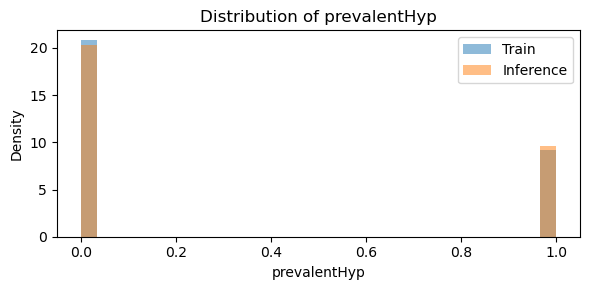

🔹 Feature: diabetes
   KS Statistic: 0.0104
   P-value      : 1.0000
   ✅ No significant drift detected


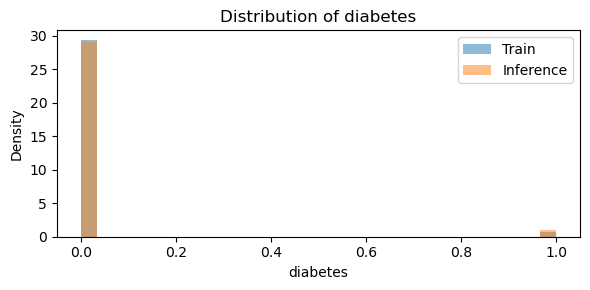

🔹 Feature: totChol
   KS Statistic: 0.0258
   P-value      : 0.5930
   ✅ No significant drift detected


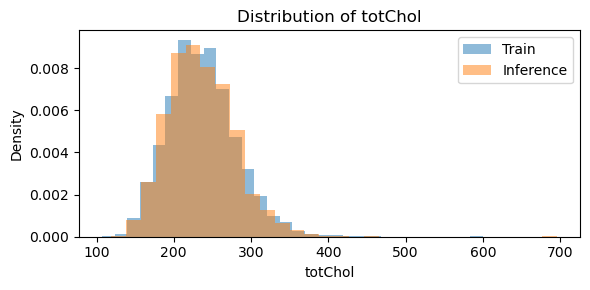

🔹 Feature: sysBP
   KS Statistic: 0.0233
   P-value      : 0.7148
   ✅ No significant drift detected


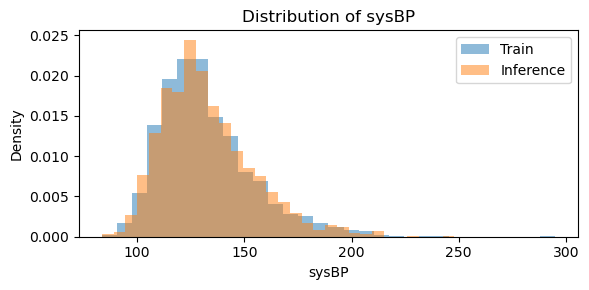

🔹 Feature: diaBP
   KS Statistic: 0.0182
   P-value      : 0.9256
   ✅ No significant drift detected


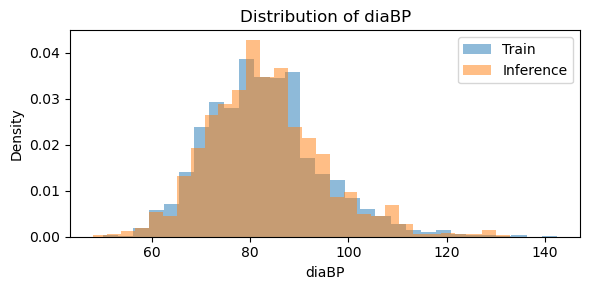

🔹 Feature: BMI
   KS Statistic: 0.0314
   P-value      : 0.3445
   ✅ No significant drift detected


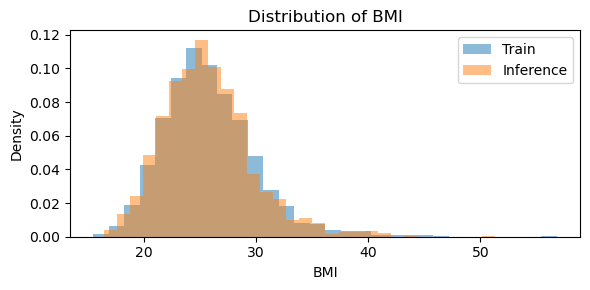

🔹 Feature: heartRate
   KS Statistic: 0.0515
   P-value      : 0.0182
   ⚠️ Drift detected (distributions differ significantly)


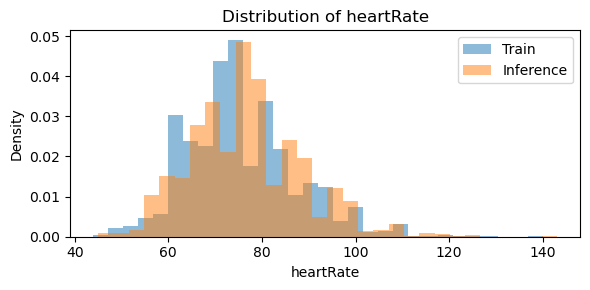

🔹 Feature: glucose
   KS Statistic: 0.0488
   P-value      : 0.0335
   ⚠️ Drift detected (distributions differ significantly)


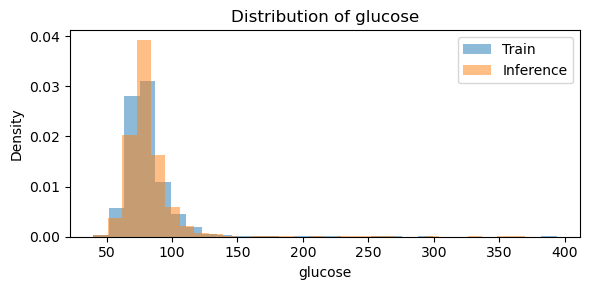

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Load datasets
train_df = pd.read_csv('framingham_3000.csv')
inference_df = pd.read_csv('framingham_1240_notarget.csv')

# Drop target column from training data
if 'TenYearCHD' in train_df.columns:
    train_df = train_df.drop(columns=['TenYearCHD'])

# Get common columns
common_cols = train_df.columns.intersection(inference_df.columns)

print("📊 Drift Detection Report:\n")

for col in common_cols:
    train_col = train_df[col].dropna()
    inf_col = inference_df[col].dropna()

    # KS test
    ks_stat, p_value = ks_2samp(train_col, inf_col)

    print(f"🔹 Feature: {col}")
    print(f"   KS Statistic: {ks_stat:.4f}")
    print(f"   P-value      : {p_value:.4f}")

    # Interpret result
    if p_value < 0.05:
        print("   ⚠️ Drift detected (distributions differ significantly)")
    else:
        print("   ✅ No significant drift detected")
    
    # Plot distributions
    plt.figure(figsize=(6, 3))
    plt.hist(train_col, bins=30, alpha=0.5, label='Train', density=True)
    plt.hist(inf_col, bins=30, alpha=0.5, label='Inference', density=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import pickle
import warnings
warnings.filterwarnings("ignore")

# Load labeled datasets
df_3000 = pd.read_csv("framingham_3000.csv")
df_1240 = pd.read_csv("framingham_1240.csv")

# Combine datasets
df_combined = pd.concat([df_3000, df_1240], ignore_index=True)

# Separate features and target
X = df_combined.drop(columns=["TenYearCHD"])
y = df_combined["TenYearCHD"]

# Fill missing values
X.fillna(X.median(), inplace=True)

# SMOTE for balancing
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_balanced)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42
)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluation function
def get_metrics(y_true, y_pred, y_proba):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_proba)
    }

# Training metrics
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)[:, 1]
train_metrics = get_metrics(y_train, y_train_pred, y_train_proba)

# Testing metrics
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]
test_metrics = get_metrics(y_test, y_test_pred, y_test_proba)

# Print results
print("\n✅ Training Metrics:")
for k, v in train_metrics.items():
    print(f"{k}: {v:.4f}")

print("\n✅ Testing Metrics:")
for k, v in test_metrics.items():
    print(f"{k}: {v:.4f}")

# Save model, scaler, features and metrics
pipeline = {
    'model': model,
    'scaler': scaler,
    'selected_features': list(X.columns),
    'train_metrics': train_metrics,
    'test_metrics': test_metrics
}

with open('framingham_inference_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print("\n✅ Pipeline and metrics saved to 'framingham_inference_pipeline.pkl'")



✅ Training Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000

✅ Testing Metrics:
Accuracy: 0.9048
Precision: 0.9230
Recall: 0.8832
F1 Score: 0.9026
ROC-AUC: 0.9629

✅ Pipeline and metrics saved to 'framingham_inference_pipeline.pkl'


In [23]:
import pandas as pd
import pickle

# Load pipeline
with open('framingham_inference_pipeline.pkl', 'rb') as f:
    pipeline = pickle.load(f)

model = pipeline['model']
scaler = pipeline['scaler']
selected_features = pipeline['selected_features']

# Function to process and predict
def generate_predictions(file_path):
    df = pd.read_csv(file_path)

    # Fill missing values
    df.fillna(df.median(), inplace=True)

    # Ensure only the required features are used
    df_selected = df[selected_features]

    # Scale features
    df_scaled = scaler.transform(df_selected)

    # Predict
    predictions = model.predict(df_scaled)
    probabilities = model.predict_proba(df_scaled)[:, 1]

    # Add predictions to the DataFrame
    df['Predicted_TenYearCHD'] = predictions
    df['CHD_Probability'] = probabilities

    # Save predictions back to the same file
    df.to_csv(file_path, index=False)
    print(f"✅ Predictions added to '{file_path}'")

# Predict for both datasets
generate_predictions("framingham_3000_notarget.csv")
generate_predictions("framingham_1240_notarget.csv")


✅ Predictions added to 'framingham_3000_notarget.csv'
✅ Predictions added to 'framingham_1240_notarget.csv'


In [26]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load all necessary files
df_3000 = pd.read_csv("framingham_3000.csv")
df_3000_pred = pd.read_csv("framingham_3000_notarget.csv")
df_1240_pred = pd.read_csv("framingham_1240_notarget.csv")
df_1240_true = pd.read_csv("framingham_1240.csv")

# Evaluation function
def compute_metrics(y_true, y_pred, y_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_proba)
    }

# Calculate metrics
metrics_3000 = compute_metrics(
    df_3000["TenYearCHD"],
    df_3000_pred["Predicted_TenYearCHD"],
    df_3000_pred["CHD_Probability"]
)

metrics_1240 = compute_metrics(
    df_1240_true["TenYearCHD"],
    df_1240_pred["Predicted_TenYearCHD"],
    df_1240_pred["CHD_Probability"]
)

# Also label the 3000_notarget entry as a separate one
metrics_3000_notarget = compute_metrics(
    df_3000["TenYearCHD"],
    df_3000_pred["Predicted_TenYearCHD"],
    df_3000_pred["CHD_Probability"]
)

# Display all three metrics clearly
def print_metrics(label, metrics):
    print(f"\n📊 Evaluation Metrics for {label}")
    print("-" * 40)
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")

print_metrics("framingham_3000 (True Labels vs Predictions)", metrics_3000)
print_metrics("framingham_1240 (True Labels vs Predictions)", metrics_1240)
print_metrics("framingham_3000_notarget (duplicate of 3000 preds)", metrics_3000_notarget)



📊 Evaluation Metrics for framingham_3000 (True Labels vs Predictions)
----------------------------------------
Accuracy: 0.9727
Precision: 0.9236
Recall: 0.8954
F1 Score: 0.9093
ROC-AUC: 0.9909

📊 Evaluation Metrics for framingham_1240 (True Labels vs Predictions)
----------------------------------------
Accuracy: 0.9685
Precision: 0.8967
Recall: 0.8919
F1 Score: 0.8943
ROC-AUC: 0.9883

📊 Evaluation Metrics for framingham_3000_notarget (duplicate of 3000 preds)
----------------------------------------
Accuracy: 0.9727
Precision: 0.9236
Recall: 0.8954
F1 Score: 0.9093
ROC-AUC: 0.9909
